<h1 style="color:#0CC0DF;">InnoByte Services - Data Analyst Internship Project</h1>                                    

<h4 style="color:#FF6EC7;">Problem Statement:</h4>
Analyze and Provide Insights on Amazon Sales Report 

<h4 style="color:#FF6EC7;">Problem Description:</h4>
The provided dataset contains information about sales transactions on Amazon, including details such as order 
ID, date, status, fulfilment method, sales channel, product category, size, quantity, amount, shipping details, 
and more. The objective is to conduct a comprehensive analysis of the data and extract actionable insights to 
support business decision-making. 

<h2 style="color:#0CC0DF; border-bottom:1px  #00BFFF;">1. Importing Required Libraries</h2>


In [5]:
import pandas as pd
import numpy as np
import warnings
import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
warnings.filterwarnings("ignore")

<h2 style="color:#0CC0DF;">2. Loading the Dataset</h2>


In [7]:
df = pd.read_csv(r"C:\Users\divya\Downloads\Amazon Sale Report.csv")


In [8]:
# Display the first few rows of the dataset
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [9]:
df.shape

(128976, 21)

There are 128976 rows and 21 columns

<h2 style="color:#0CC0DF;">3. Data Overview</h3>


In [12]:
# To get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [13]:
# To get statistical details about data
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [14]:
#Checking null values
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

<Axes: >

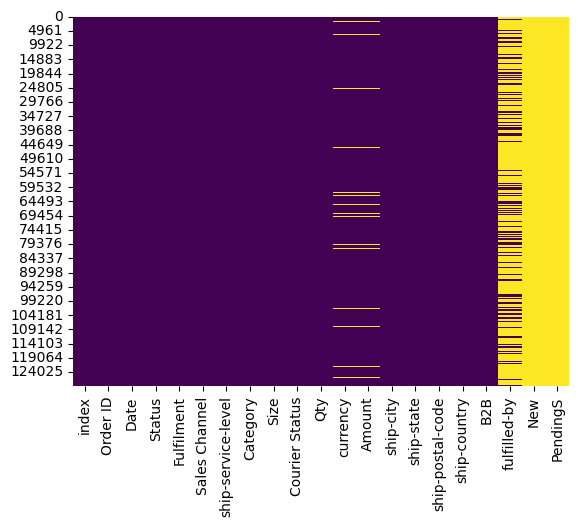

In [15]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [16]:
#Missing value percentage
percentage_missing = df.isnull().sum()*100/len(df)
print(percentage_missing)

index                   0.000000
Order ID                0.000000
Date                    0.000000
Status                  0.000000
Fulfilment              0.000000
Sales Channel           0.000000
ship-service-level      0.000000
Category                0.000000
Size                    0.000000
Courier Status          0.000000
Qty                     0.000000
currency                6.047637
Amount                  6.047637
ship-city               0.027137
ship-state              0.027137
ship-postal-code        0.027137
ship-country            0.027137
B2B                     0.000000
fulfilled-by           69.557902
New                   100.000000
PendingS              100.000000
dtype: float64


<h2 style="color:#0CC0DF;">4. Data Cleaning and Preprocessing</h2>


In [18]:
# Dropping the columns 'index', 'New', and 'PendingS' from the DataFrame as they are not needed for the analysis.
df.drop(['index','New', 'PendingS'], axis = 1, inplace = True)

In [19]:
df.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

In [21]:
#Checking the duplicated records
df.duplicated().sum()

959

In [22]:
#Dropping duplicates and storing again in df
df= df.drop_duplicates(subset='Order ID', keep='first')

In [23]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


In [24]:
#Checking for duplicates again
df.duplicated().sum()

0

In [25]:
df.shape

(120229, 18)

After removing duplicates, the shape changed to (120229, 18). 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120229 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            120229 non-null  object 
 1   Date                120229 non-null  object 
 2   Status              120229 non-null  object 
 3   Fulfilment          120229 non-null  object 
 4   Sales Channel       120229 non-null  object 
 5   ship-service-level  120229 non-null  object 
 6   Category            120229 non-null  object 
 7   Size                120229 non-null  object 
 8   Courier Status      120229 non-null  object 
 9   Qty                 120229 non-null  int64  
 10  currency            112834 non-null  object 
 11  Amount              112834 non-null  float64
 12  ship-city           120201 non-null  object 
 13  ship-state          120201 non-null  object 
 14  ship-postal-code    120201 non-null  float64
 15  ship-country        120201 non-null  ob

In [28]:
# Let us rename the columns
# Use a dictionary that maps current column name to provided name

columns_rename = {
    'Order ID': 'Order ID',
    'Date': 'Order Date',
    'Status': 'Order Status',
    'Fulfilment': 'Fulfillment Method',
    'Sales Channel': 'Sales Channel',
    'ship-service-level': 'Shipping Service Level',
    'Category': 'Product Category',
    'Size': 'Product Size',
    'Courier Status': 'Courier Status',
    'currency': 'Currency',
    'Amount': 'Sales Amount',
    'ship-city': 'Shipping City',
    'ship-state': 'Shipping State',
    'ship-postal-code': 'Postal Code',
    'ship-country': 'Shipping Country',
    'B2B': 'Is B2B',
    'fulfilled-by': 'Fulfilled By',
}
 

# Apply the mapping function to rename the columns
df.rename(columns = columns_rename, inplace = True)
df.head()

,Order ID,Order Date,Order Status,Fulfillment Method,Sales Channel,Shipping Service Level,Product Category,Product Size,Courier Status,Qty,Currency,Sales Amount,Shipping City,Shipping State,Postal Code,Shipping Country,Is B2B,Fulfilled By
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [29]:
# Select categorical columns
cat_columns = df.select_dtypes(include=['object'])

# Calculate the frequency of categorical values in each selected column
frequency_counts = {}

for column in cat_columns:
    frequency_counts[column] = df[column].value_counts()

# Display the frequency counts in a DataFrame
for column, counts in frequency_counts.items():
    print(f"Frequency counts for {column}:")
    display(pd.DataFrame(counts).reset_index().rename(columns={'index': column, column: 'Frequency'}))
    print()  # Add a blank line for better readability


Frequency counts for Order ID:


,Frequency,count
0,405-8078784-5731545,1
1,406-1215244-3102736,1
2,406-2541011-7698761,1
3,405-4263755-8391555,1
4,171-1378241-7289107,1
...,...,...
120224,403-6424778-0432340,1
120225,403-8886117-8394730,1
120226,407-3321197-3692327,1
120227,406-4636235-5853965,1



Frequency counts for Order Date:


,Frequency,count
0,05-03-2022,1941
1,05-02-2022,1906
2,05-04-2022,1896
3,04-14-22,1754
4,04-15-22,1733
...,...,...
86,05-21-22,1002
87,06-25-22,977
88,06-24-22,950
89,06-29-22,606



Frequency counts for Order Status:


,Frequency,count
0,Shipped,72742
1,Shipped - Delivered to Buyer,26521
2,Cancelled,17166
3,Shipped - Returned to Seller,1850
4,Shipped - Picked Up,918
5,Pending,584
6,Pending - Waiting for Pick Up,262
7,Shipped - Returning to Seller,130
8,Shipped - Out for Delivery,32
9,Shipped - Rejected by Buyer,11



Frequency counts for Fulfillment Method:


,Frequency,count
0,Amazon,83906
1,Merchant,36323



Frequency counts for Sales Channel:


,Frequency,count
0,Amazon.in,120105
1,Non-Amazon,124



Frequency counts for Shipping Service Level:


,Frequency,count
0,Expedited,82827
1,Standard,37402



Frequency counts for Product Category:


,Frequency,count
0,T-shirt,47145
1,Shirt,45856
2,Blazzer,14703
3,Trousers,10008
4,Perfume,1079
5,Wallet,890
6,Socks,404
7,Shoes,143
8,Watch,1



Frequency counts for Product Size:


,Frequency,count
0,M,21067
1,L,20325
2,XL,19225
3,XXL,16552
4,S,15714
5,3XL,13423
6,XS,10233
7,Free,2113
8,6XL,672
9,5XL,516



Frequency counts for Courier Status:


,Frequency,count
0,Shipped,102049
1,On the Way,6380
2,Unshipped,6182
3,Cancelled,5618



Frequency counts for Currency:


,Frequency,count
0,INR,112834



Frequency counts for Shipping City:


,Frequency,count
0,BENGALURU,10441
1,HYDERABAD,7404
2,MUMBAI,5645
3,NEW DELHI,5425
4,CHENNAI,4925
...,...,...
8943,Rayachoty,1
8944,"ALAGAPPAPURAM,kanyakumari district",1
8945,Bhattanagar .liluah .Howrah,1
8946,NALLAJERLA,1



Frequency counts for Shipping State:


,Frequency,count
0,MAHARASHTRA,20756
1,KARNATAKA,16162
2,TAMIL NADU,10507
3,TELANGANA,10394
4,UTTAR PRADESH,10057
...,...,...
64,Mizoram,1
65,rajsthan,1
66,Punjab/Mohali/Zirakpur,1
67,Rajsthan,1



Frequency counts for Shipping Country:


,Frequency,count
0,IN,120201



Frequency counts for Fulfilled By:


,Frequency,count
0,Easy Ship,36323


In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120229 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Order ID                120229 non-null  object        
 1   Order Date              120229 non-null  datetime64[ns]
 2   Order Status            120229 non-null  object        
 3   Fulfillment Method      120229 non-null  object        
 4   Sales Channel           120229 non-null  object        
 5   Shipping Service Level  120229 non-null  object        
 6   Product Category        120229 non-null  object        
 7   Product Size            120229 non-null  object        
 8   Courier Status          120229 non-null  object        
 9   Qty                     120229 non-null  int64         
 10  Currency                112834 non-null  object        
 11  Sales Amount            112834 non-null  float64       
 12  Shipping City           120201 non-

In [32]:
# Check unique values in the 'Order Status' column
order_status_unique = df['Order Status'].unique()
print("Unique values in 'Order Status' column:")
print(order_status_unique)

Unique values in 'Order Status' column:
['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged' 'Shipping']


In [33]:
# Split the 'Order Status' column by '-' and extract the second part
df['Order Status'] = df['Order Status'].str.split('-').str[1]

# Remove leading and trailing spaces
df['Order Status'] = df['Order Status'].str.strip()

# Replace NaN values with 'Cancelled'
df['Order Status'] = df['Order Status'].fillna('Cancelled')

# Check the unique values to ensure they are cleaned
print("Unique values in 'Order Status' column after cleaning and replacement:")
print(df['Order Status'].unique())


Unique values in 'Order Status' column after cleaning and replacement:
['Cancelled' 'Delivered to Buyer' 'Returned to Seller' 'Rejected by Buyer'
 'Lost in Transit' 'Out for Delivery' 'Returning to Seller' 'Picked Up'
 'Waiting for Pick Up' 'Damaged']


In [34]:
# Check unique values in the 'Fulfillment Method' column
fulfillment_method_unique = df['Fulfillment Method'].unique()
print("Unique values in 'Fulfillment Method' column:")
print(fulfillment_method_unique)

Unique values in 'Fulfillment Method' column:
['Merchant' 'Amazon']


In [35]:
# Check unique values in the 'Sales Channel' column
sales_channel_unique = df['Sales Channel'].unique()
print("Unique values in 'Sales Channel' column:")
print(sales_channel_unique)

Unique values in 'Sales Channel' column:
['Amazon.in' 'Non-Amazon']


In [36]:
df['Sales_Channel'] = df['Sales Channel'].replace('Amazon.in','Amazon')
# Check the unique values to ensure they are cleaned
print("Unique values in 'Sales Channel' column after replacement:")
print(df['Sales Channel'].unique())

Unique values in 'Sales Channel' column after replacement:
['Amazon.in' 'Non-Amazon']


In [37]:
# Check unique values in the 'Shipping Service Level' column
shipping_service_level_unique = df['Shipping Service Level'].unique()
print("Unique values in 'Shipping Service Level' column:")
print(shipping_service_level_unique)

Unique values in 'Shipping Service Level' column:
['Standard' 'Expedited']


In [38]:
# Check unique values in the 'Product Category' column
product_category_unique = df['Product Category'].unique()
print("Unique values in 'Product Category' column:")
print(product_category_unique)

Unique values in 'Product Category' column:
['T-shirt' 'Shirt' 'Blazzer' 'Trousers' 'Perfume' 'Socks' 'Shoes' 'Wallet'
 'Watch']


In [39]:
# Check unique values in the 'Product Size' column
product_size_unique = df['Product Size'].unique()
print("Unique values in 'Product Size' column:")
print(product_size_unique)

Unique values in 'Product Size' column:
['S' '3XL' 'XL' 'L' 'XXL' 'XS' '6XL' 'M' '4XL' 'Free' '5XL']


In [40]:
# Check unique values in the 'Courier Status' column
courier_status_unique = df['Courier Status'].unique()
print("Unique values in 'Courier Status' column:")
print(courier_status_unique)

Unique values in 'Courier Status' column:
['On the Way' 'Shipped' 'Cancelled' 'Unshipped']


In [41]:
# Check unique values in the 'Qty' column
qty_unique = df['Qty'].unique()
print("Unique values in 'Qty' column:")
qty_unique

Unique values in 'Qty' column:


array([ 0,  1,  2, 15,  3,  9, 13,  5,  4], dtype=int64)

In [42]:
# Check unique values in the 'Currency' column
currency_unique = df['Currency'].unique()
print("Unique values in 'Currency' column:")
print(currency_unique)

Unique values in 'Currency' column:
['INR' nan]


In [43]:
# Replace NaN values with 'INR'
df['Currency'] = df['Currency'].fillna('INR')

# Display unique values after cleaning
currency_unique = df['Currency'].unique()
print("Unique values in 'Currency' column after replacing NaN:")
print(currency_unique)

Unique values in 'Currency' column after replacing NaN:
['INR']


In [44]:
# Check unique values in the 'Shipping City' column
shipping_city_unique = df['Shipping City'].unique()
print("Unique values in 'Shipping City' column:")
shipping_city_unique

Unique values in 'Shipping City' column:


array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [45]:
# Function to remove special characters from city names
def sanitize_city_name(city):
    if isinstance(city, str):
        return re.sub(r'[^A-Za-z\s]', '', city)
    return city

In [46]:
# Convert text to uppercase
df['Shipping City'] = df['Shipping City'].str.upper()

# Clean the 'Shipping City' column
df['Shipping City'] = df['Shipping City'].apply(sanitize_city_name)

In [47]:
# Print all unique values in 'Shipping City' column
shipping_city_unique = df['Shipping City'].unique()
print("Unique values in 'Shipping City' column after cleaning and replacement:")
print(shipping_city_unique)

Unique values in 'Shipping City' column after cleaning and replacement:
['MUMBAI' 'BENGALURU' 'NAVI MUMBAI' ... 'CHERUKUNNU PO'
 'GULABPURA DISTT BHILWARA' 'PRAYAGRAJ ALLAHABAD']


In [48]:
#Checking null values in Shipping City column
df['Shipping City'].isnull().sum()

28

In [49]:
#Replacing null values with 'NA'
df['Shipping City'] = df['Shipping City'].replace(np.nan, "NA")

In [50]:
df['Shipping City'].isnull().sum()

0

In [51]:
# Check unique values in the 'Shipping State' column
shipping_state_unique = df['Shipping State'].unique()
print("Unique values in 'Shipping State' column:")
shipping_state_unique

Unique values in 'Shipping State' column:


array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'Goa', 'MEGHALAYA', 'GOA', 'MANIPUR',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR', 'Punjab', 'Rajshthan', 'Manipur', 'rajasthan',
       'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab', 'New Delhi',
       'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry', 'delhi', 'RJ',
       'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB', 'APO',
       'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [52]:
# Convert text to uppercase
df['Shipping State'] = df['Shipping State'].str.upper()

In [53]:
# Define a dictionary with incorrect state names and their replacements
state_replacements = {
    "NA": "NAGALAND",
    "NL": "NAGALAND",
    "RJ": "RAJASTHAN",
    "PB": "PUNJAB",
    "APO": "ANDHRA PRADESH",
    "AR": "ARUNACHAL PRADESH",
    "DELHI": "NEW DELHI",
    "RAJSTHAN": "RAJASTHAN",
    "RAJSHTHAN": "RAJASTHAN",
    "PUNJAB/MOHALI/ZIRAKPUR": "PUNJAB",
    "PUDUCHERRY": "PONDICHERRY"
}

# Apply the dictionary to replace incorrect values in the 'ship-state' column
df['Shipping State'] = df['Shipping State'].replace(state_replacements)

In [54]:
print("Unique values in 'Shipping_State' column after cleaning and replacement:")
df['Shipping State'].unique()

Unique values in 'Shipping_State' column after cleaning and replacement:


array(['MAHARASHTRA', 'KARNATAKA', 'PONDICHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'NEW DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'MIZORAM', 'ORISSA', 'LAKSHADWEEP'], dtype=object)

In [55]:
#Checking null values in Shipping City column
df['Shipping State'].isnull().sum()

28

In [56]:
#Replacing null values with 'NA'
df['Shipping State'] = df['Shipping State'].replace(np.nan,"NA")

In [57]:
df['Shipping State'].isnull().sum()

0

In [58]:
# Check unique values in the 'Shipping Country' column
shipping_country_unique = df['Shipping Country'].unique()
print("Unique values in 'Shipping Country' column:")
print(shipping_country_unique)

Unique values in 'Shipping Country' column:
['IN' nan]


In [59]:
# Clean and standardize the 'Shipping Country' column
# Remove any extra spaces and convert all entries to uppercase
df['Shipping Country'] = df['Shipping Country'].str.strip().str.upper()

# Fill NaN values with 'IN'
df['Shipping Country'] = df['Shipping Country'].fillna('IN')

In [60]:
print("Unique values in 'Shipping Country' column after cleaning and replacement:")
df['Shipping Country'].unique()

Unique values in 'Shipping Country' column after cleaning and replacement:


array(['IN'], dtype=object)

In [61]:
# Check unique values in the 'Postal Code' column
postal_code_unique = df['Postal Code'].unique()
print("Unique values in 'Postal Code' column:")
print(postal_code_unique)

Unique values in 'Postal Code' column:
[400081. 560085. 410210. ... 609603. 851205. 629152.]


In [62]:
# Replace NaN values with 'Not Available'
df['Postal Code'] = df['Postal Code'].fillna('Not Available')

# Display unique values after cleaning
postal_code_unique = df['Postal Code'].unique()
print("Unique values in 'Postal Code' column after replacing NaN:")
print(postal_code_unique )

Unique values in 'Postal Code' column after replacing NaN:
[400081.0 560085.0 410210.0 ... 609603.0 851205.0 629152.0]


In [63]:
# Check unique values in the 'Is B2B' column
is_B2B_unique = df['Is B2B'].unique()
print("Unique values in 'Is B2B' column:")
print(is_B2B_unique)

Unique values in 'Is B2B' column:
[False  True]


In [64]:
# Check unique values in the 'Is B2B' column
fulfilled_by_unique = df['Fulfilled By'].unique()
print("Unique values in 'Fulfilled By' column:")
print(fulfilled_by_unique)

Unique values in 'Fulfilled By' column:
['Easy Ship' nan]


In [65]:
# Replace NaN values with 'Not Available'
df['Fulfilled By'] = df['Fulfilled By'].fillna('Not Available')

# Display unique values after cleaning
unique_fulfilled_by = df['Fulfilled By'].unique()
print("Unique values in 'Fulfilled By' column after replacing NaN:")
print(unique_fulfilled_by)

Unique values in 'Fulfilled By' column after replacing NaN:
['Easy Ship' 'Not Available']


In [66]:
df.isnull().sum()

Order ID                     0
Order Date                   0
Order Status                 0
Fulfillment Method           0
Sales Channel                0
Shipping Service Level       0
Product Category             0
Product Size                 0
Courier Status               0
Qty                          0
Currency                     0
Sales Amount              7395
Shipping City                0
Shipping State               0
Postal Code                  0
Shipping Country             0
Is B2B                       0
Fulfilled By                 0
Sales_Channel                0
dtype: int64

In [67]:
# Check unique values in the 'Is B2B' column
amt = df['Sales Amount'].unique()
print("Unique values in 'Fulfilled By' column:")
print(amt)

Unique values in 'Fulfilled By' column:
[ 647.62  406.    329.   ...  708.58 1244.    639.  ]


In [68]:
df['Sales Amount'] = df['Sales Amount'].fillna(0)

In [69]:
df.isnull().sum()

Order ID                  0
Order Date                0
Order Status              0
Fulfillment Method        0
Sales Channel             0
Shipping Service Level    0
Product Category          0
Product Size              0
Courier Status            0
Qty                       0
Currency                  0
Sales Amount              0
Shipping City             0
Shipping State            0
Postal Code               0
Shipping Country          0
Is B2B                    0
Fulfilled By              0
Sales_Channel             0
dtype: int64

<h2 style="color:#0CC0DF;">5. Feature Engineering</h2>


- Adding other columns based on the columns we have

In [72]:
df.head()

,Order ID,Order Date,Order Status,Fulfillment Method,Sales Channel,Shipping Service Level,Product Category,Product Size,Courier Status,Qty,Currency,Sales Amount,Shipping City,Shipping State,Postal Code,Shipping Country,Is B2B,Fulfilled By,Sales_Channel
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,Amazon
1,171-9198151-1101146,2022-04-30,Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Amazon
2,404-0687676-7273146,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Not Available,Amazon
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PONDICHERRY,605008.0,IN,False,Easy Ship,Amazon
4,407-1069790-7240320,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Not Available,Amazon


In [73]:
## create a new column total amount 
df['Total Sales'] = df['Qty'] * df['Sales Amount']

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120229 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Order ID                120229 non-null  object        
 1   Order Date              120229 non-null  datetime64[ns]
 2   Order Status            120229 non-null  object        
 3   Fulfillment Method      120229 non-null  object        
 4   Sales Channel           120229 non-null  object        
 5   Shipping Service Level  120229 non-null  object        
 6   Product Category        120229 non-null  object        
 7   Product Size            120229 non-null  object        
 8   Courier Status          120229 non-null  object        
 9   Qty                     120229 non-null  int64         
 10  Currency                120229 non-null  object        
 11  Sales Amount            120229 non-null  float64       
 12  Shipping City           120229 non-

In [75]:
# Check unique values in the 'Total Sales' column
sales = df['Total Sales'].unique()
print("Unique values in 'Total Sales' column:")
sales

Unique values in 'Total Sales' column:


array([    0.,   406.,   329.,   574.,   824.,   653.,   399.,   363.,
         685.,   364.,   657.,   771.,   544.,   458.,   886.,   517.,
         666.,   376.,   499.,   582.,   299.,   459.,   791.,  1233.,
         487.,   699.,   885.,   424.,  1126.,   788.,   759.,  1146.,
         665.,   429.,   848.,   654.,  1033.,   390.,   493.,   721.,
         597.,   888.,   353.,   599.,   518.,   852.,   909.,   432.,
         545.,   696.,   631.,   316.,   362.,   751.,   684.,   377.,
         744.,   859.,   825.,   680.,   725.,  1338.,   472.,   832.,
         692.,   318.,  1186.,   311.,   387.,   348.,   635.,   790.,
         375.,  1115.,   579.,   442.,   690.,  1399.,   999.,   496.,
         845.,   568.,   295.,   484.,   626.,   563.,   512.,  1112.,
         583.,   534.,   319.,   368.,   795.,   449.,   463.,   591.,
         435.,  1099.,   533.,   486.,  1065.,  4260.,   968.,   682.,
        1140.,   660.,   345.,   339.,  1133.,  1463.,   471.,   342.,
      

In [76]:
df['Order Date'].unique()

<DatetimeArray>
['2022-04-30 00:00:00', '2022-04-29 00:00:00', '2022-04-28 00:00:00',
 '2022-04-27 00:00:00', '2022-04-26 00:00:00', '2022-04-25 00:00:00',
 '2022-04-24 00:00:00', '2022-04-23 00:00:00', '2022-04-22 00:00:00',
 '2022-04-21 00:00:00', '2022-04-20 00:00:00', '2022-04-19 00:00:00',
 '2022-04-18 00:00:00', '2022-04-17 00:00:00', '2022-04-16 00:00:00',
 '2022-04-15 00:00:00', '2022-04-14 00:00:00', '2022-04-13 00:00:00',
 '2022-04-12 00:00:00', '2022-04-11 00:00:00', '2022-04-10 00:00:00',
 '2022-04-09 00:00:00', '2022-04-08 00:00:00', '2022-04-07 00:00:00',
 '2022-04-06 00:00:00', '2022-04-05 00:00:00', '2022-04-04 00:00:00',
 '2022-04-03 00:00:00', '2022-04-02 00:00:00', '2022-04-01 00:00:00',
 '2022-03-31 00:00:00', '2022-05-31 00:00:00', '2022-05-30 00:00:00',
 '2022-05-29 00:00:00', '2022-05-28 00:00:00', '2022-05-27 00:00:00',
 '2022-05-26 00:00:00', '2022-05-25 00:00:00', '2022-05-24 00:00:00',
 '2022-05-23 00:00:00', '2022-05-22 00:00:00', '2022-05-21 00:00:00',
 '20

In [77]:
## Adding a seperate year, month, day column
df['Day'] = df['Order Date'].dt.day
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [78]:
## extract month name from date column
df['Month Name'] = df['Order Date'].dt.month_name()

<h2 style="color:#0CC0DF;">6. Exploratory Data Analysis</h2>

In [80]:
#Calculate count of orders in the dataset
order_count = df.shape[0]

print("Total number of orders:", order_count)

Total number of orders: 120229


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120229 entries, 0 to 128975
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Order ID                120229 non-null  object        
 1   Order Date              120229 non-null  datetime64[ns]
 2   Order Status            120229 non-null  object        
 3   Fulfillment Method      120229 non-null  object        
 4   Sales Channel           120229 non-null  object        
 5   Shipping Service Level  120229 non-null  object        
 6   Product Category        120229 non-null  object        
 7   Product Size            120229 non-null  object        
 8   Courier Status          120229 non-null  object        
 9   Qty                     120229 non-null  int64         
 10  Currency                120229 non-null  object        
 11  Sales Amount            120229 non-null  float64       
 12  Shipping City           120229 non-

In [82]:
## preprocess the data
df = df.sort_values(by='Order Date')

<h2 style="color:green;">I. Sales Overview</h2>
Understand the overall sales performance, trends, and patterns over time

In [84]:
monthly_sales = (
    df
    .set_index("Order Date")
    .resample("M")
    .agg({
        "Qty":"sum",
        "Is B2B": "sum",
        "Total Sales":"mean"
    })
)

monthly_sales

,Qty,Is B2B,Total Sales
Order Date,,,
2022-03-31,144,0,585.753165
2022-04-30,41130,310,566.323634
2022-05-31,35444,259,602.208791
2022-06-30,31919,225,605.298483


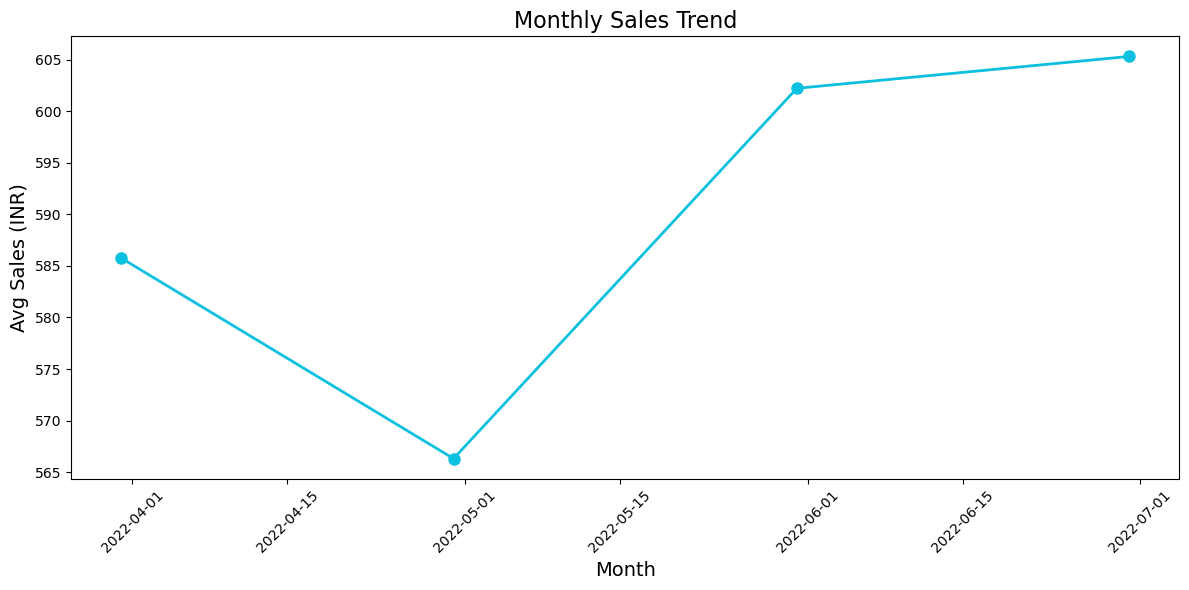

In [85]:
# Monthly Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Sales'], color='#0CC0DF', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Avg Sales (INR)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The average monthly sales have fluctuated over the period.
- There was a decline in avg sales from March to April, followed by a significant increase from May to June.

In [87]:
# Aggregate sales data by Month
sales_overview = df.groupby(['Month Name']).agg({
    'Total Sales': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Order Count'}).reset_index()
sales_overview


,Month Name,Total Sales,Order Count
0,April,25886087.0,45709
1,June,21270794.0,35141
2,March,92549.0,158
3,May,23619231.0,39221


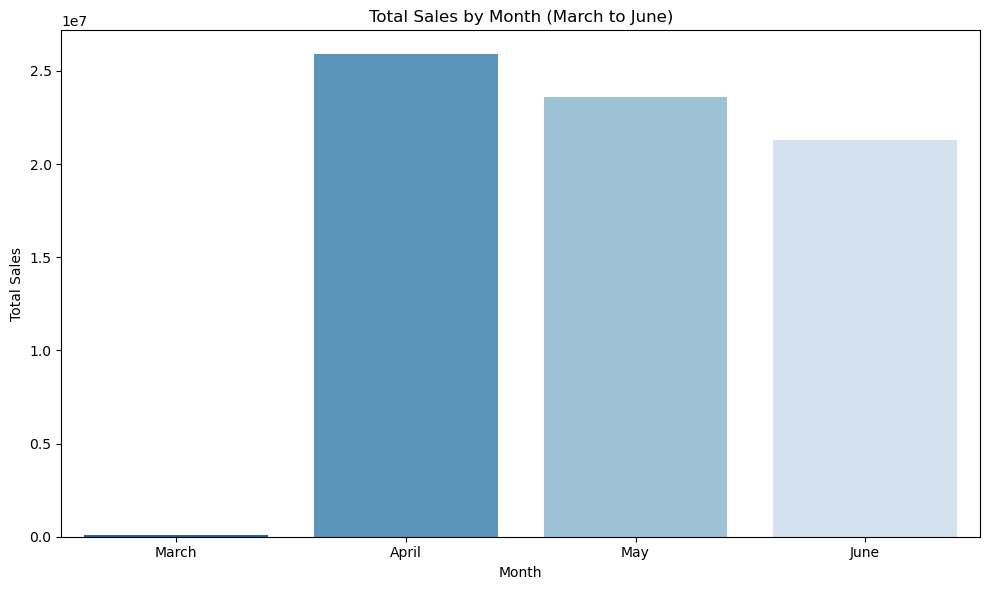

In [88]:
# Define the correct order for the months
month_order = ['March', 'April', 'May', 'June']

# Convert the 'Month Name' column to a categorical type with the specified order
sales_overview['Month Name'] = pd.Categorical(sales_overview['Month Name'], categories=month_order, ordered=True)

# Sort the DataFrame by 'Month Name' to ensure it's in the correct order
sales_overview = sales_overview.sort_values('Month Name')

# Plot the Total Sales by Month (March to June)
plt.figure(figsize=(10,6))
sns.barplot(data=sales_overview, x='Month Name', y='Total Sales', palette='Blues_r')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month (March to June)')
plt.tight_layout()
plt.show()

-  The total sales increased dramatically from March to April, reaching a peak in April. This substantial growth could be attributed to various factors, such as promotional activities, seasonal demand, or changes in product offerings.
- Sales declined slightly from April to May and further decreased in June. This decline might be due to factors such as economic conditions, competitive pressure, or changes in consumer behavior.

In [90]:
#Filter and group by 'Month Name' to calculate the number of cancelled orders
cancellations = df[df['Order Status'] == 'Cancelled'].groupby('Month Name')['Order ID'].count().reset_index()

# Rename 'Order ID' column to 'Cancelled Orders'
cancellations = cancellations.rename(columns={'Order ID': 'Cancelled Orders'})

# Define the correct order for months
month_order = ['March', 'April', 'May', 'June']

# Convert 'Month Name' to a categorical type with the specified order
cancellations['Month Name'] = pd.Categorical(cancellations['Month Name'], categories=month_order, ordered=True)

#Sort the DataFrame by 'Month Name'
cancellations = cancellations.sort_values('Month Name')

#Display the result
cancellations


,Month Name,Cancelled Orders
2,March,141
0,April,33800
3,May,28994
1,June,27565


In [91]:
# Merge with sales_overview
sales_overview = sales_overview.merge(cancellations, on='Month Name', how='left')
sales_overview

,Month Name,Total Sales,Order Count,Cancelled Orders
0,March,92549.0,158,141
1,April,25886087.0,45709,33800
2,May,23619231.0,39221,28994
3,June,21270794.0,35141,27565


- April had the highest total sales (25,886,087.0), followed by May (23,619,231.0), June (21,270,794.0), and March (92549.0).

In [93]:
sales_overview['Cancelled Orders'] = sales_overview['Cancelled Orders'].fillna(0)
sales_overview['Cancellation Rate'] = (sales_overview['Cancelled Orders'] / sales_overview['Order Count']) * 100
sales_overview['AOV'] = sales_overview['Total Sales'] / sales_overview['Order Count']

# Sort by Month number to ensure correct order in plots
sales_overview = sales_overview.sort_values('Month Name')

# Display the aggregated DataFrame
sales_overview

,Month Name,Total Sales,Order Count,Cancelled Orders,Cancellation Rate,AOV
0,March,92549.0,158,141,89.240506,585.753165
1,April,25886087.0,45709,33800,73.946050,566.323634
2,May,23619231.0,39221,28994,73.924683,602.208791
3,June,21270794.0,35141,27565,78.441137,605.298483


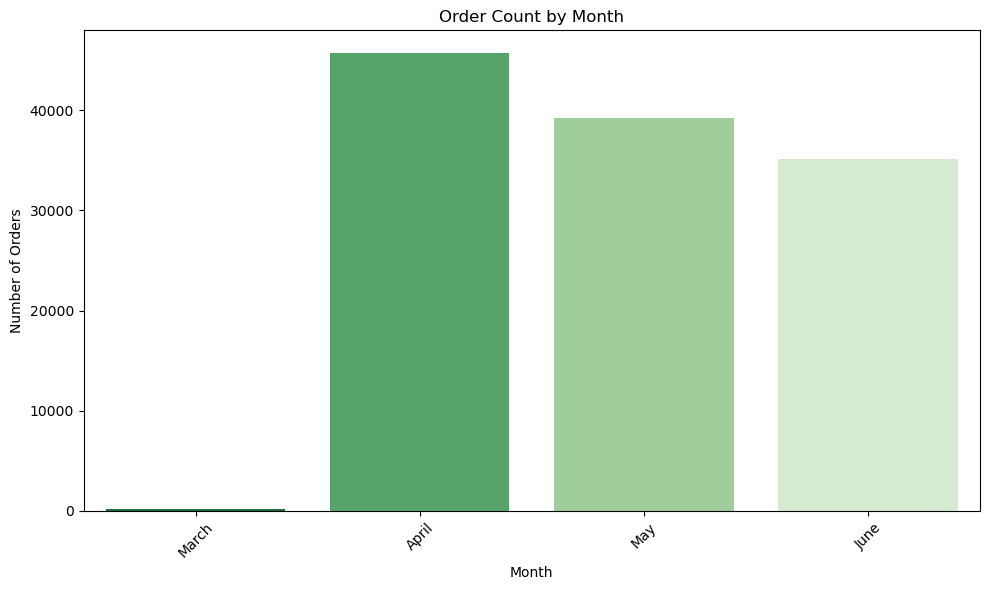

In [94]:
#Plotting Order Count by Month
plt.figure(figsize=(10,6))
sns.barplot(data=sales_overview, x='Month Name', y='Order Count', palette='Greens_r')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Order Count by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- The order count reached its peak in April, indicating the highest demand activity during this month.
- In contrast, March saw the lowest order count, suggesting minimal demand or sales compared to the other months.

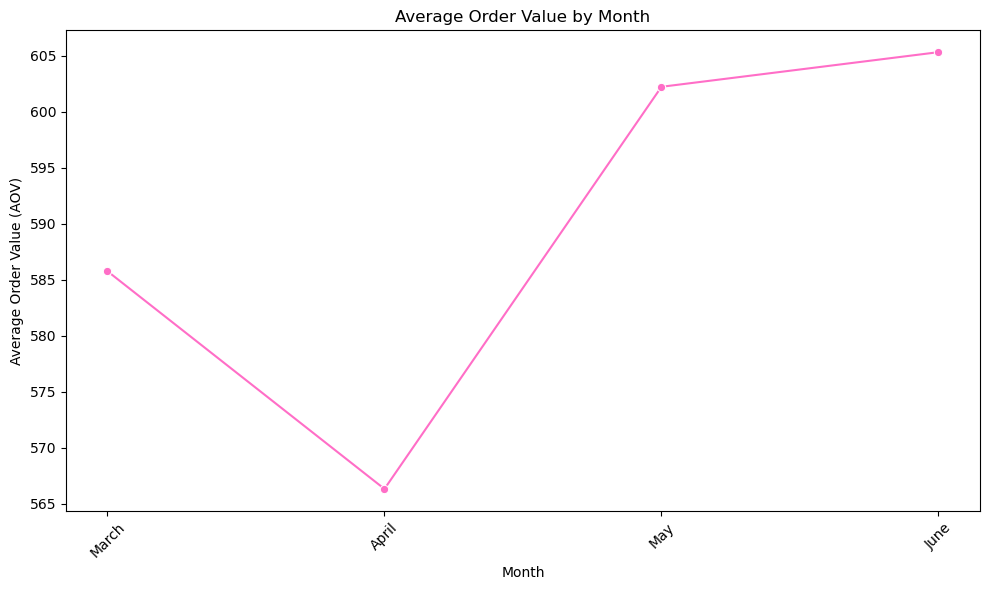

In [96]:
#Visualizing Average Order Value by Month
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_overview, x='Month Name', y='AOV', marker='o', color='#FF6EC7')
plt.xlabel('Month')
plt.ylabel('Average Order Value (AOV)')
plt.title('Average Order Value by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- A significant jump in Average Order Value (AOV) was observed from April to May and then again, a jump in June. This suggests that customers were purchasing larger quantities or higher-priced items during this period.
- The overall trend suggests an increase in AOV over the four-month period. This indicates a positive development for the business, as customers are spending more per order on average.

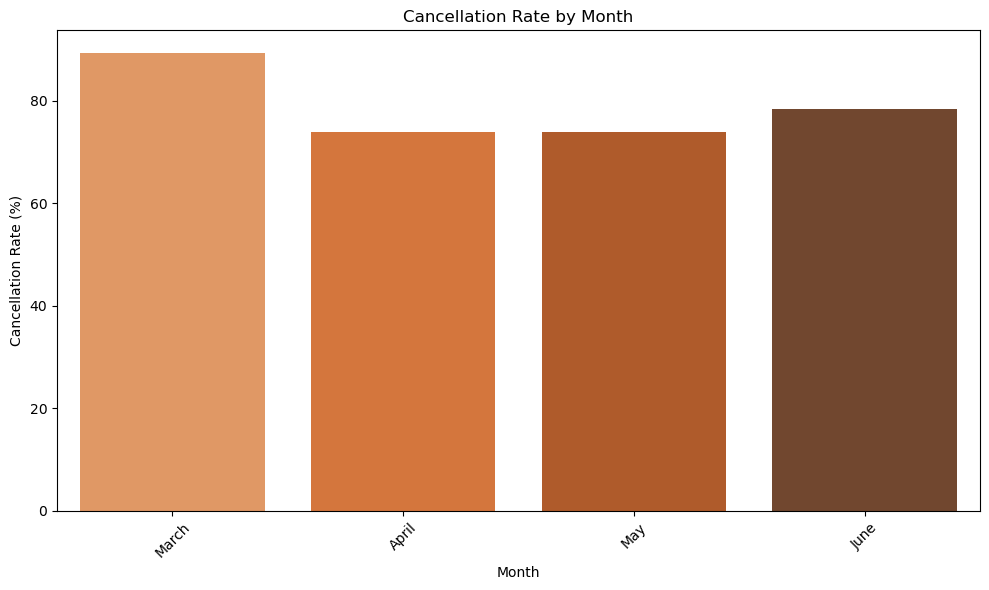

In [98]:
#Cancellation Rate by Month
plt.figure(figsize=(10,6))
sns.barplot(data=sales_overview, x='Month Name', y='Cancellation Rate', palette='Oranges_d')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.title('Cancellation Rate by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- March had the highest cancellation rate despite having the lowest order count and total sales, suggesting a potential issue with order fulfillment or customer satisfaction during this month.

<h2 style="color:green;">II. Product Analysis</h2>
Analyze the distribution of product categories, sizes, and quantities sold to identify popular 
products. 

<h5 style="color:#1E90FF;"> Analyze Distribution of Product Categories.</h5>


In [102]:
# 1. Distribution of Product Categories
category_sales = df.groupby('Product Category')['Total Sales'].sum().sort_values(ascending=False)
print(category_sales)

Product Category
T-shirt     35460260.0
Shirt       18988371.0
Blazzer     10128191.0
Trousers     4922518.0
Perfume       703932.0
Wallet        425041.0
Socks         131704.0
Shoes         108339.0
Watch            305.0
Name: Total Sales, dtype: float64


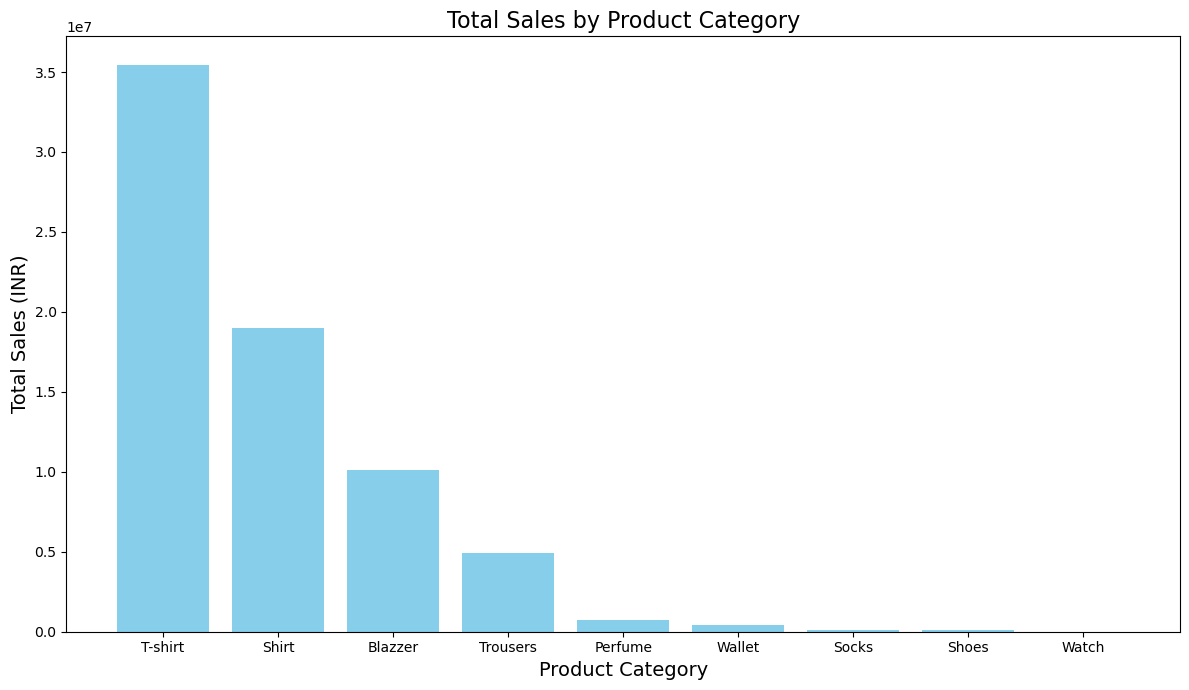

In [103]:
# Plotting Product Category Distribution
plt.figure(figsize=(12, 7))
plt.bar(category_sales.index, category_sales.values, color='skyblue')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales (INR)', fontsize=14)
plt.tight_layout()
plt.show()


- T-shirts dominate the sales, accounting for a substantial portion of the total revenue.
- Shirts and blazers also contribute significantly to the overall sales.
- The remaining categories have relatively low sales, indicating that they may require further analysis and strategies to improve their performance.

<h5 style="color:#1E90FF;"> Analyze Distribution of Product Sizes.</h5>

In [106]:
# 2. Distribution of Product Sizes
size_sales = df.groupby('Product Size')['Total Sales'].sum().sort_values(ascending=False)
size_sales

Product Size
M       12441324.0
L       11752228.0
XL      11055102.0
XXL      9478239.0
S        9420415.0
3XL      8020990.0
XS       6259623.0
Free     1237617.0
6XL       511418.0
5XL       393494.0
4XL       298211.0
Name: Total Sales, dtype: float64

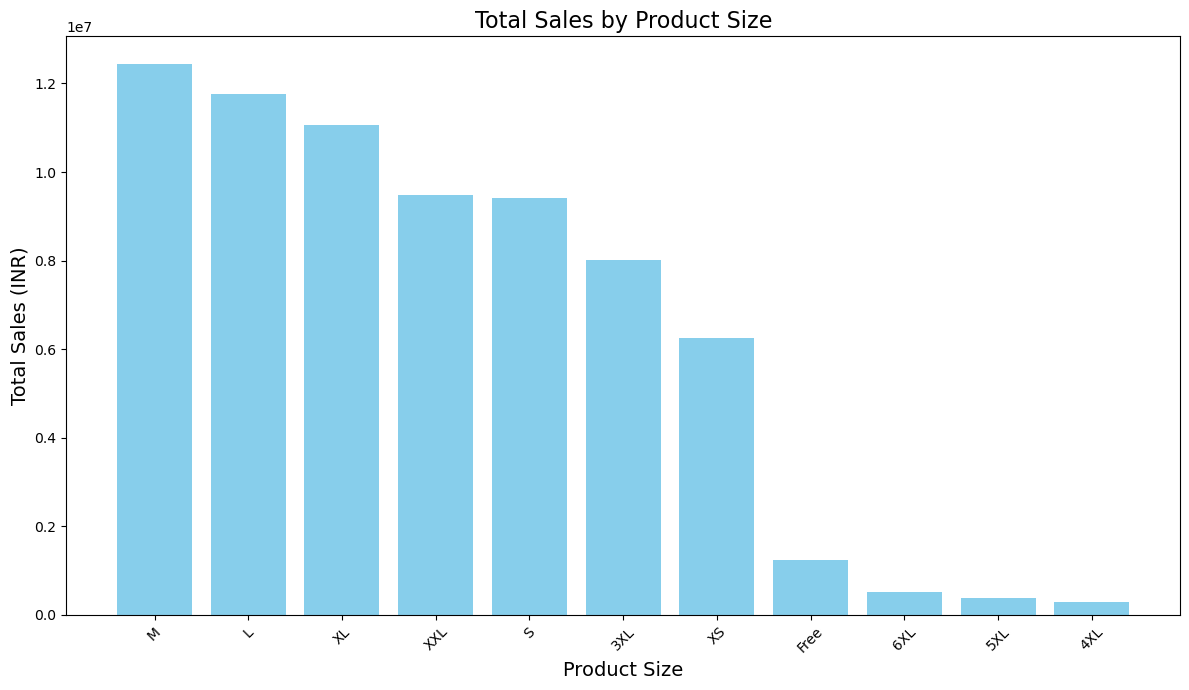

In [107]:
# Plotting Product Size Distribution
plt.figure(figsize=(12, 7))
plt.bar(size_sales.index, size_sales.values, color='skyblue')
plt.title('Total Sales by Product Size', fontsize=16)
plt.xlabel('Product Size', fontsize=14)
plt.ylabel('Total Sales (INR)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Medium (M) is the most popular size, accounting for the largest portion of the total sales.
- Large (L) and extra-large (XL) are also popular sizes, with relatively high sales.
- The demand for larger size is less
- 4XL is the least popular size

<h5 style="color:#1E90FF;"> Quantity Sold Analysis</h5>

In [110]:
# 3. Quantity Sold Analysis
quantity_sold_by_category = df.groupby('Product Category')['Qty'].sum().sort_values(ascending=False)
quantity_sold_by_category


Product Category
T-shirt     42428
Shirt       41365
Blazzer     13212
Trousers     9324
Perfume       979
Wallet        830
Socks         368
Shoes         130
Watch           1
Name: Qty, dtype: int64

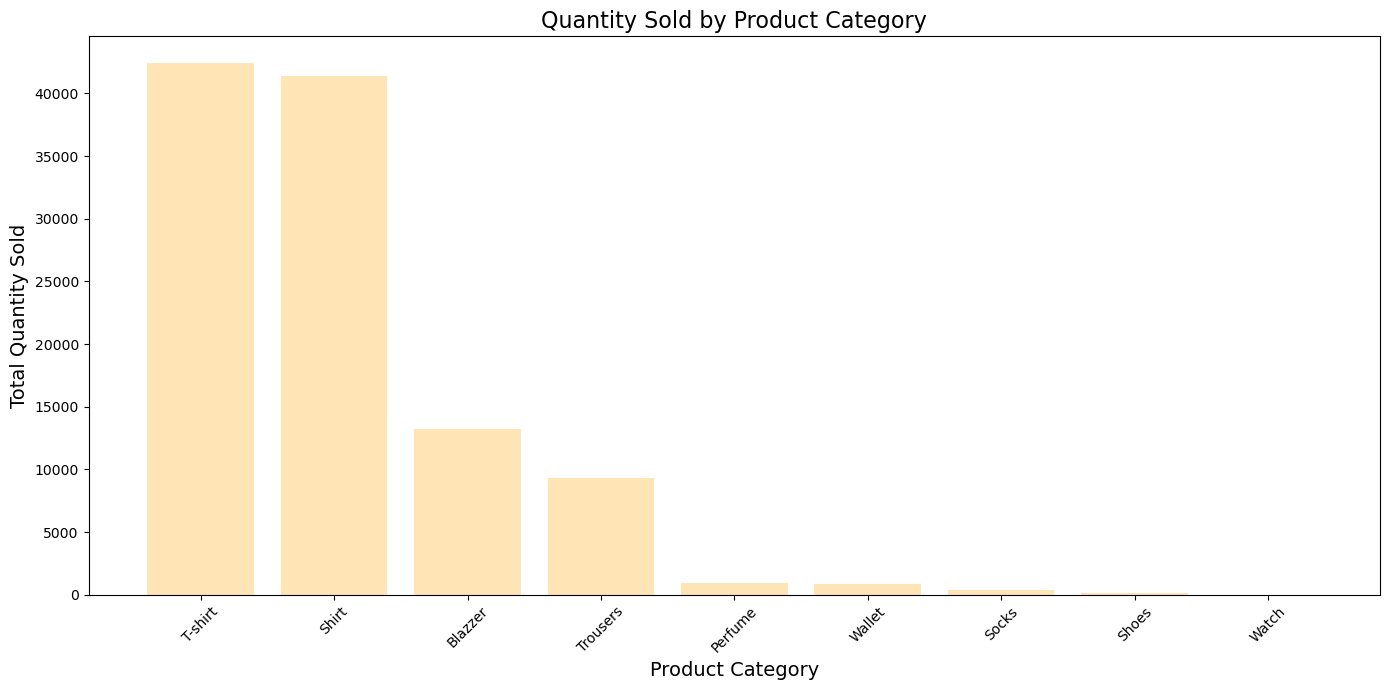

In [111]:
# Plotting Quantity Sold by Category
plt.figure(figsize=(14, 7))
plt.bar(quantity_sold_by_category.index, quantity_sold_by_category.values, color='moccasin')
plt.title('Quantity Sold by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- T-shirts, shirts, and blazers are the top-selling product categories in terms of quantity, contributing significantly to the overall sales.
- The remaining categories have relatively low quantities sold, indicating that they may require further analysis and strategies to improve their performance.

In [113]:
quantity_sold_by_size = df.groupby('Product Size')['Qty'].sum().sort_values(ascending=False)
quantity_sold_by_size

Product Size
M       18942
L       18353
XL      17415
XXL     15109
S       14066
3XL     12252
XS       9090
Free     1940
6XL       625
5XL       484
4XL       361
Name: Qty, dtype: int64

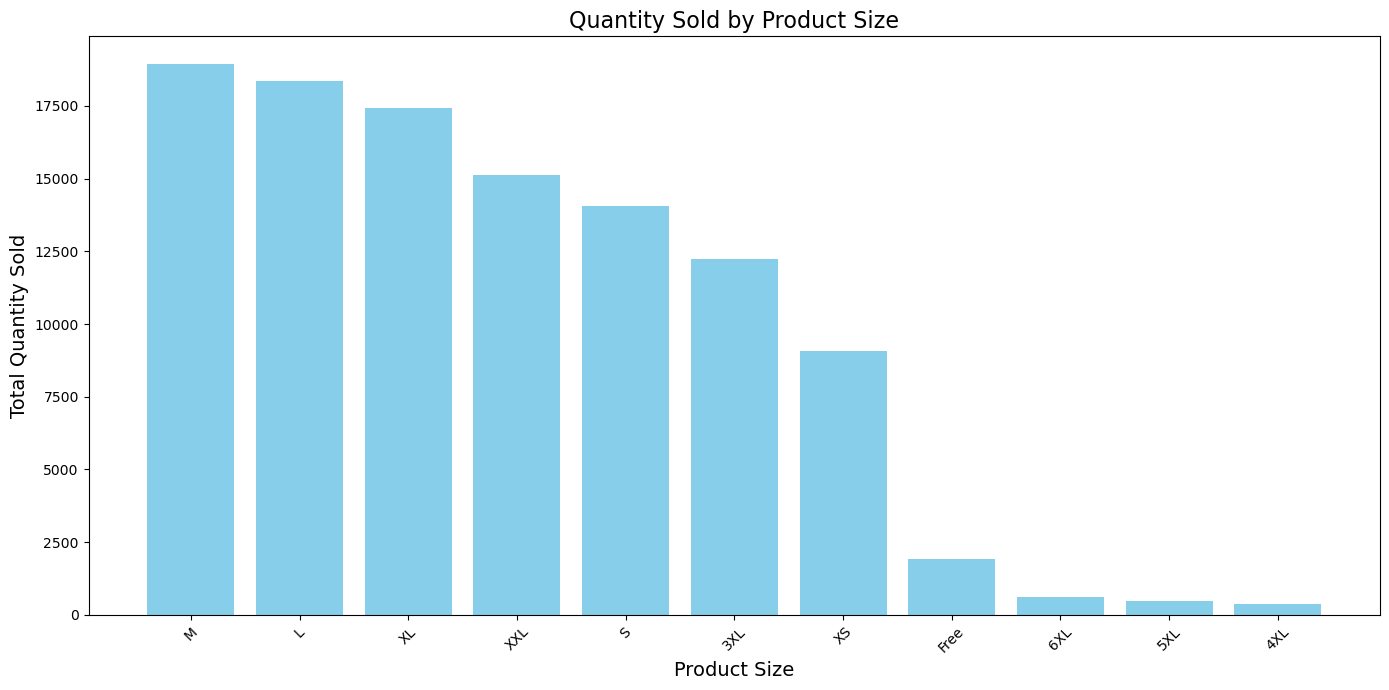

In [114]:
# Plotting Quantity Sold by Size
plt.figure(figsize=(14, 7))
plt.bar(quantity_sold_by_size.index, quantity_sold_by_size.values, color='skyblue')
plt.title('Quantity Sold by Product Size', fontsize=16)
plt.xlabel('Product Size', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Medium (M) is the top-selling product size, followed by large (L) and extra-large (XL). 
- The demand for 6XL size is more compared to 4XL and 5XL.

<h5 style="color:#1E90FF;"> Analyzing the distribution of sales across different order statuses.</h5>

In [117]:
# Sales Status Distribution
status_summary = (
    df
    .groupby('Order Status')
    .agg({
        'Qty': 'sum',
        'Total Sales': 'sum'
    })
)
status_summary

,Qty,Total Sales
Order Status,,
Cancelled,78788,51280446.0
Damaged,1,1136.0
Delivered to Buyer,26616,17413707.0
Lost in Transit,4,1498.0
Out for Delivery,32,23847.0
Picked Up,922,628183.0
Rejected by Buyer,11,7295.0
Returned to Seller,1865,1231795.0
Returning to Seller,134,100404.0


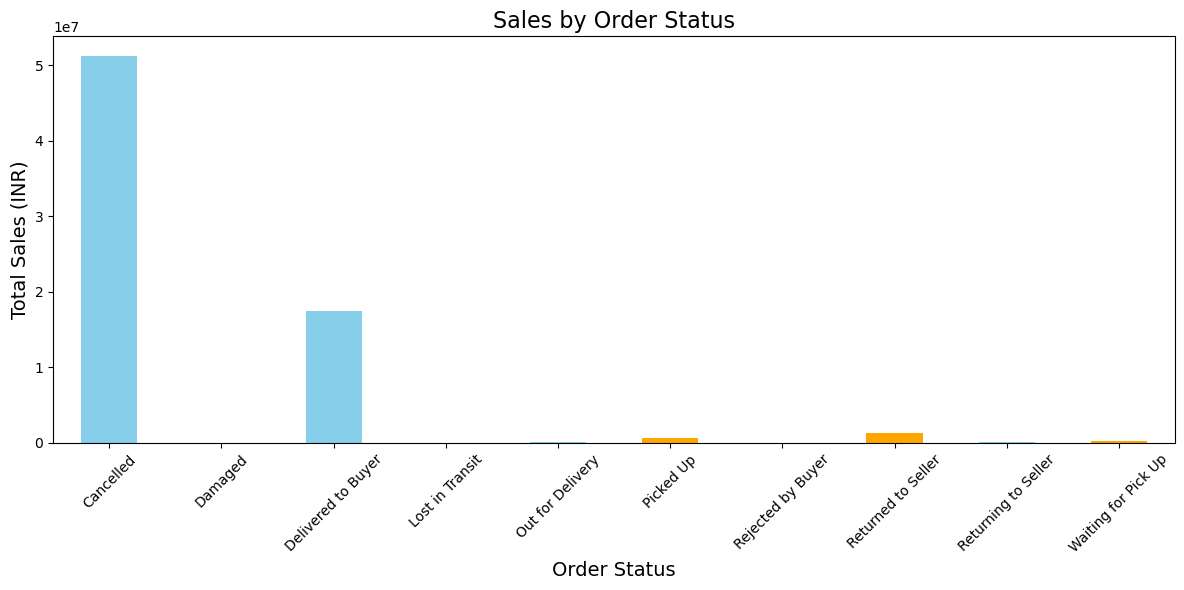

In [118]:
# Plot Sales Status Distribution
plt.figure(figsize=(12, 6))
status_summary['Total Sales'].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Sales by Order Status', fontsize=16)
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Total Sales (INR)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Canceled orders are the dominant order status in terms of total sales, indicating a potential area for improvement. 
- The high number of canceled orders might be due to factors such as stock availability issues, incorrect order processing, or customer dissatisfaction.
- Delivered to Buyer order status represents a significant portion of the sales, indicating successful order fulfillment and delivery.
- Analyzing the reasons behind canceled orders can help identify opportunities to improve order fulfillment and reduce cancellations.

<h2 style="color:green;">III. Fulfillment Analysis:</h2>
Investigate the fulfillment methods used and their effectiveness in delivering orders

<h5 style="color:#1E90FF;"> Analyzing  fulfillment Methods.</h5>

In [122]:
# Fulfillment Method Analysis
fulfillment_summary = (
    df
    .groupby('Fulfillment Method')
    .agg({
        'Qty': 'sum',
        'Total Sales': 'sum'
    })
)
fulfillment_summary


,Qty,Total Sales
Fulfillment Method,,
Amazon,78568,51132008.0
Merchant,30069,19736653.0


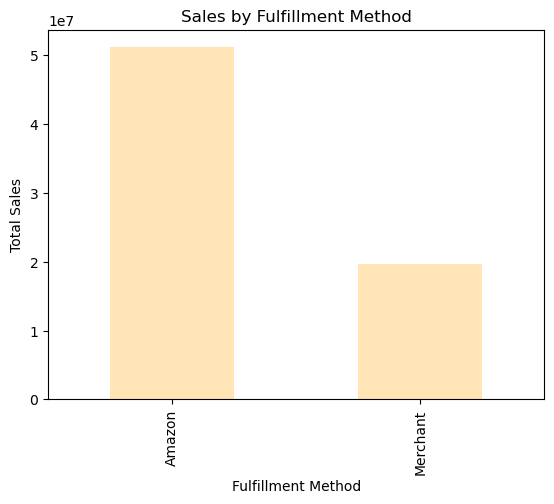

In [123]:
# Plot Sales by Fulfillment Method
fulfillment_summary['Total Sales'].plot(kind='bar', title='Sales by Fulfillment Method',color = 'moccasin')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Sales')
plt.show()

- Amazon fulfillment method generated significantly higher total sales compared to Merchant fulfillment, indicating that it is the preferred choice for most customers.
- Merchant fulfillment accounted for a relatively small portion of the total sales, suggesting that it may not be as widely used or effective compared to Amazon fulfillment.

<h5 style="color:#1E90FF;"> Examining the proportion of Standard vs. Expedited shipping service levels.</h5>

In [126]:
shipping_service_counts = df['Shipping Service Level'].value_counts()

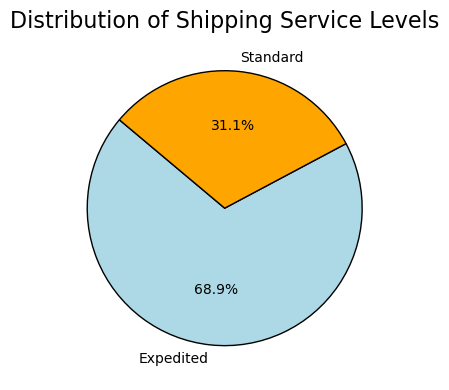

In [127]:
plt.figure(figsize=(4, 4))
colors = ['lightblue', 'orange']
plt.pie(shipping_service_counts, labels=shipping_service_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Shipping Service Levels', fontsize=16)
plt.tight_layout()
plt.show()


From the above pie chart we can clearly see,
- **Expedited Shipping is More Popular:** 68.9% of orders are shipped using expedited service, indicating a strong preference for faster delivery times among customers. This could be due to factors such as urgency, convenience, or a desire to avoid shipping delays.
- **Standard Shipping is Less Used:** Only 31.1% of orders are shipped using standard service, suggesting that customers are willing to pay a premium for expedited delivery.

<h5 style="color:#1E90FF;">Analyzing the proportion of different courier statuses (e.g., Shipped, Cancelled, On the Way) to assess the overall efficiency of the delivery process.</h5>

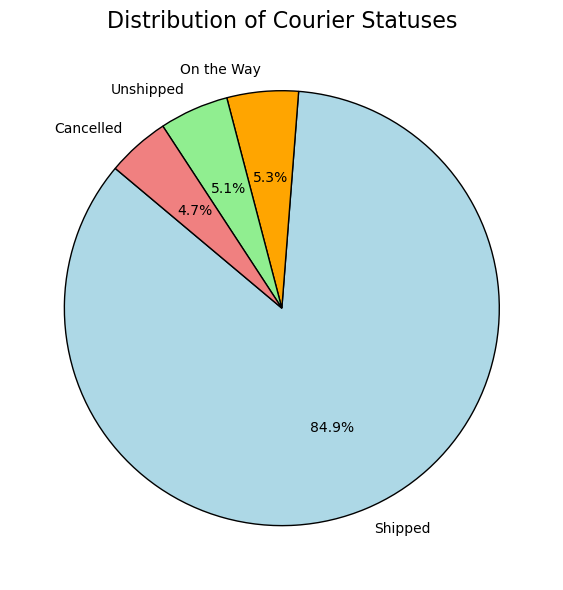

In [130]:
# Distribution by count
courier_status_counts = df['Courier Status'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(6, 6))
colors = ['lightblue', 'orange', 'lightgreen', 'lightcoral', 'gold']
plt.pie(courier_status_counts, labels=courier_status_counts.index, autopct='%1.1f%%',
        colors=colors[:len(courier_status_counts)], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Courier Statuses', fontsize=16)
plt.tight_layout()
plt.show()


- The vast majority of orders (84.9%) have been shipped successfully, indicating a high level of order fulfillment efficiency.
- However, a small percentage of orders are still unshipped or canceled, suggesting areas for improvement in the order processing and delivery process.

<h5 style="color:#1E90FF;">Examine how different shipping service levels (Standard vs. Expedited) influence courier statuses.</h5>


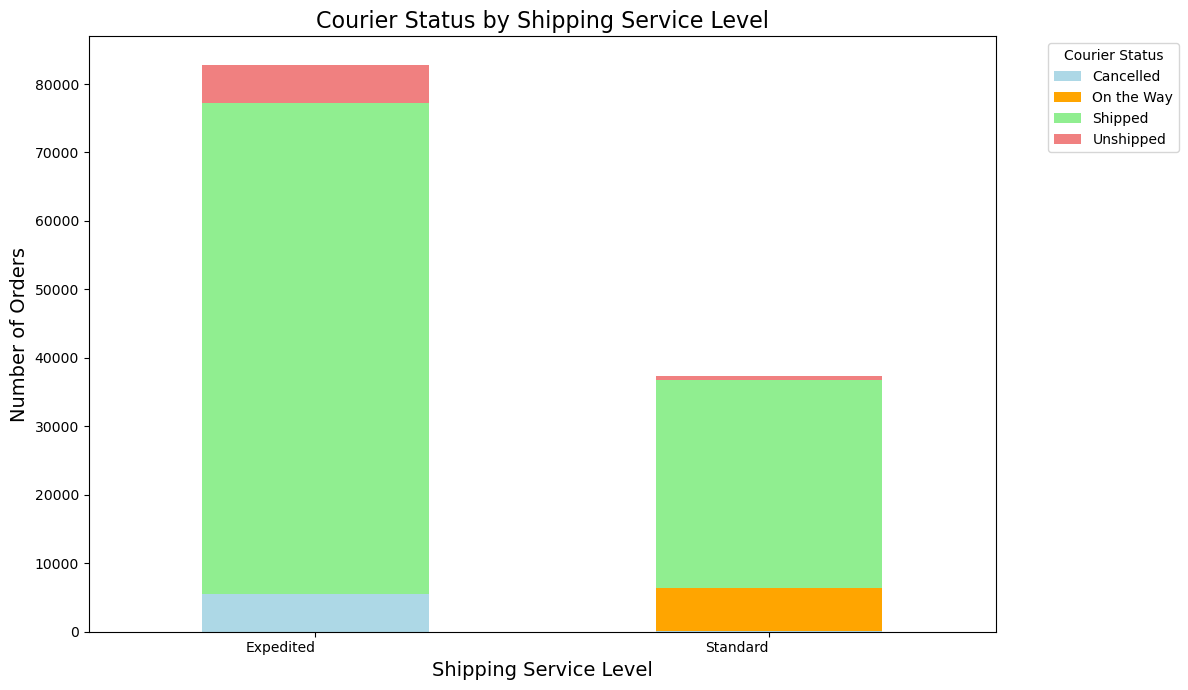

In [133]:
# Cross-tabulation between Shipping_Service_Level and Courier_Status
shipping_courier_crosstab = pd.crosstab(df['Shipping Service Level'], df['Courier Status'])

# Plotting Stacked Bar Chart
shipping_courier_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7),
                               color=['lightblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Courier Status by Shipping Service Level', fontsize=16)
plt.xlabel('Shipping Service Level', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=0, ha='right')
plt.legend(title='Courier Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- Expedited shipping appears to be a more reliable and efficient service level, with a lower rate of issues and faster delivery times.
- Standard shipping may need to be reevaluated to address the higher rate of "On the Way"  and "unshipped orders". Improvements in order processing, inventory management, or carrier selection could help mitigate these issues.

<h5 style="color:#1E90FF;"> Analyze temporal trends in courier statuses to detect recurring issues or improvements in delivery processes.</h5>

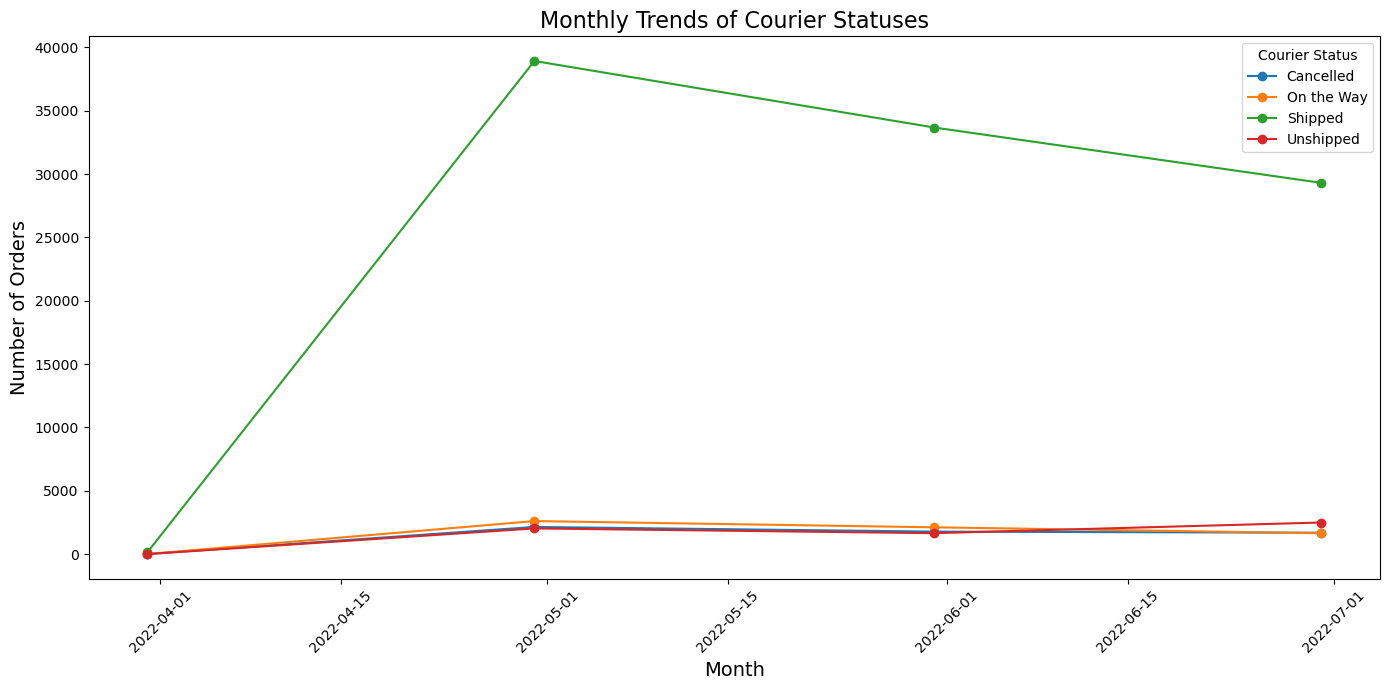

In [136]:
# Ensure 'Order_Date' is in datetime format and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
# Aggregating monthly counts for each courier status
monthly_courier_status = df.groupby([pd.Grouper(freq='M'), 'Courier Status']).size().unstack(fill_value=0)

# Plotting Trends Over Time
plt.figure(figsize=(14, 7))
for status in monthly_courier_status.columns:
    plt.plot(monthly_courier_status.index, monthly_courier_status[status], marker='o', label=status)

plt.title('Monthly Trends of Courier Statuses', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Courier Status')
plt.tight_layout()
plt.show()



- The overall trend for shipped orders is positive, indicating improved order fulfillment and delivery efficiency. However, there are still issues with canceled and unshipped orders that need to be addressed to enhance customer satisfaction. 

<h5 style="color:#1E90FF;">Analyze how different fulfillment methods affect courier statuses, such as cancellation rates or shipping delays.</h5>

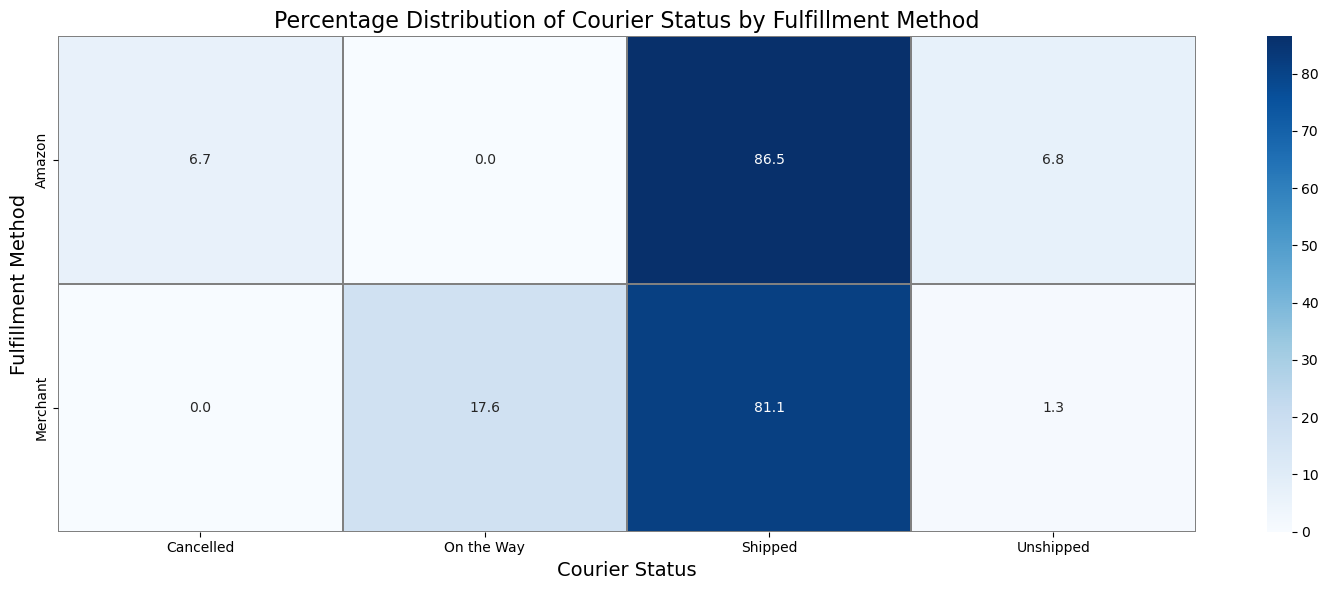

In [139]:
# Cross-tabulation between Fulfillment_Method and Courier_Status
fulfillment_courier_crosstab = pd.crosstab(df['Fulfillment Method'], df['Courier Status'], normalize='index') * 100

# Plotting Heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(fulfillment_courier_crosstab, annot=True, fmt=".1f", cmap='Blues', linewidths=.3, linecolor='grey')
plt.title('Percentage Distribution of Courier Status by Fulfillment Method', fontsize=16)
plt.xlabel('Courier Status', fontsize=14)
plt.ylabel('Fulfillment Method', fontsize=14)
plt.tight_layout()
plt.show()


The above heatmap provides a visual representation of the relationship between fulfillment method (Amazon or Merchant) and courier status (Canceled, On the Way, Shipped, or Unshipped).
- Orders fulfilled by Amazon have a significantly higher percentage of successful shipments (86.5%) compared to Merchant fulfillment(81.1%).
- Cancellation rates for Amazon orders (6.7%) which is high compared to Merchant orders (0%).
- Only a small percentage (1.3%) of Merchant orders are "Unshipped."
- A significant portion of Merchant orders approximately (17.6 %) are still "On the Way," indicating potential delays.

<h2 style="color:green;">IV. Customer Segmentation:</h2>
Segment customers based on their buying behaviour, location, and other relevant 
factors. 

<h5 style="color:#1E90FF;">Analyze sales performance using Sales Channel.</h5>

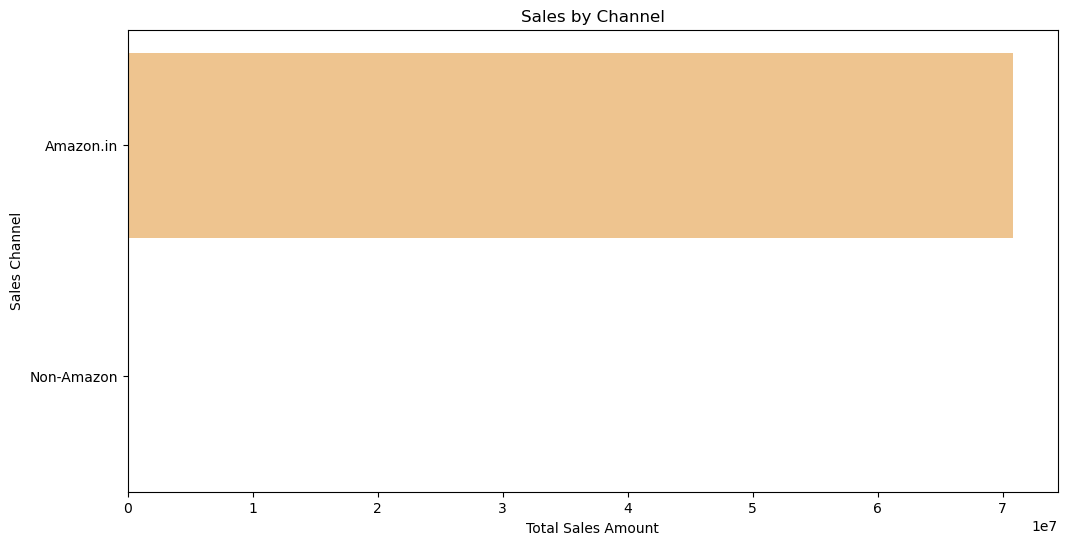

In [143]:
# Customer Segmentation by Sales Channel
channel_sales = df.groupby('Sales Channel')['Total Sales'].sum().reset_index()

# Plot sales by channel
plt.figure(figsize=(12, 6))
sns.barplot(data=channel_sales, x='Total Sales', y='Sales Channel', palette='PuOr')
plt.title('Sales by Channel')
plt.xlabel('Total Sales Amount')
plt.ylabel('Sales Channel')
plt.show()

- Amazon.in has significantly higher total sales compared to Non-Amazon.

<h5 style="color:#1E90FF;">Categorize customers into segments (e.g., B2B vs. B2C) and analyze sales performance.</h5>

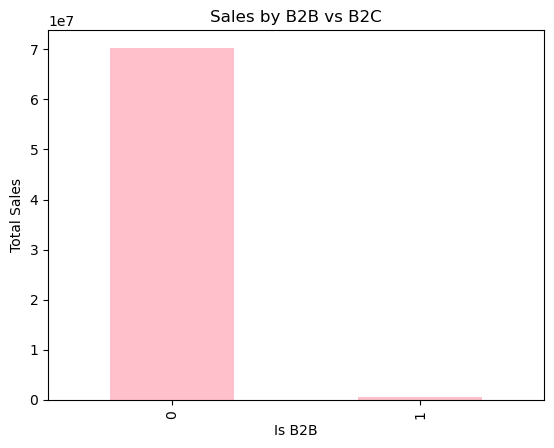

In [146]:
# Segment by B2B vs B2C
b2b_summary = df.groupby('Is B2B')['Total Sales'].sum().reset_index()
# Plot Sales by B2B vs B2C
b2b_summary['Total Sales'].plot(kind='bar', title='Sales by B2B vs B2C', color = 'pink')
plt.xlabel('Is B2B')
plt.ylabel('Total Sales')
plt.show()


- B2B sales are the dominant customer type, indicating that the business primarily focuses on selling to other businesses. 
- B2C sales are relatively low, suggesting that the business may need to explore strategies to increase its market share in the consumer market.

<h2 style="color:green;">V. Geographical Analysis:</h2>
Explore the geographical distribution of sales, focusing on states and cities.

<h5 style="color:#1E90FF;"> Let's visualize total sales across different states to identify top-performing States</h5>

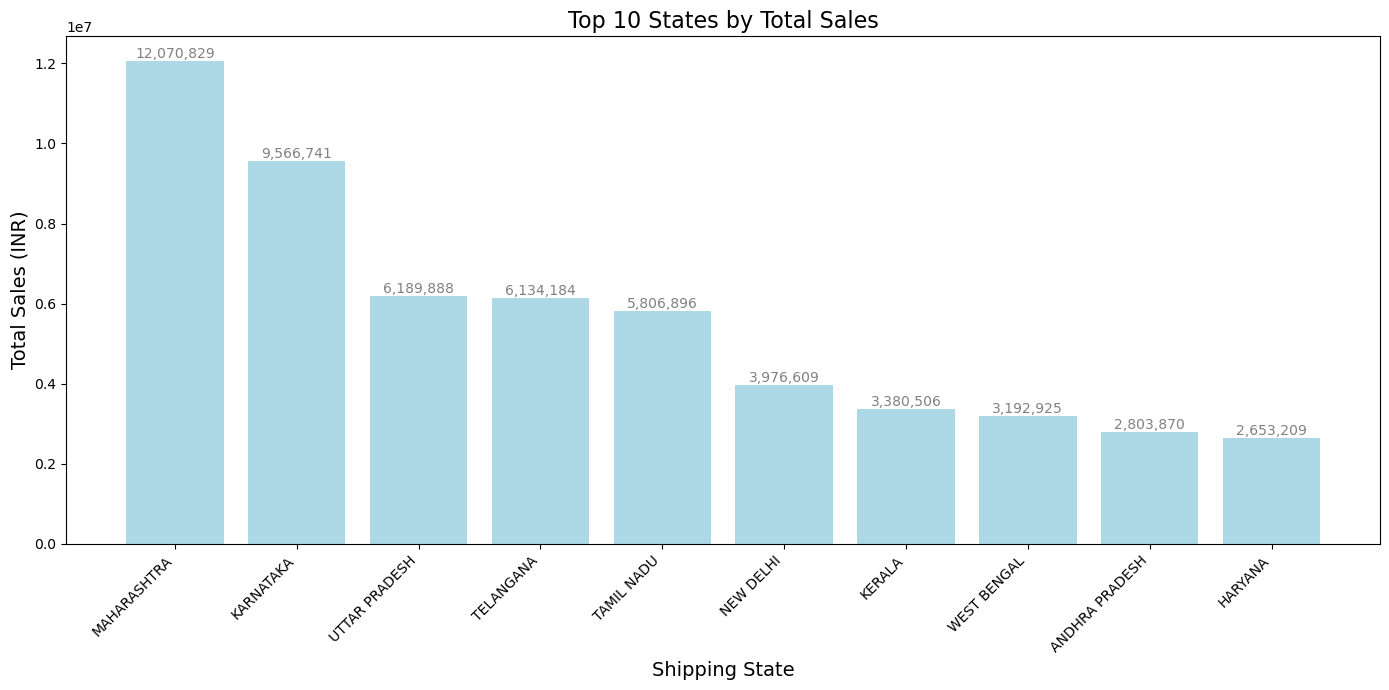

In [150]:
sales_by_state = df.groupby('Shipping State')['Total Sales'].sum().sort_values(ascending=False).head(10) # Top 10 cities for readability

#Plotting Top 10 States
plt.figure(figsize=(14, 7))
plt.bar(sales_by_state.index, sales_by_state.values, color='lightblue')
plt.title('Top 10 States by Total Sales', fontsize=16)
plt.xlabel('Shipping State', fontsize=14)
plt.ylabel('Total Sales (INR)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Adding data labels
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize= 10, color='grey')

plt.tight_layout()
plt.show()


- Maharashtra leads the sales figures with over 12 million in total sales, emerging as the top-performing state.
- It is followed by Karnataka and Uttar Pradesh, indicating strong market penetration in these regions.
- The significant contribution from Maharashtra suggests that it could be a critical market for future growth strategies, while Karnataka and Uttar Pradesh also show promising opportunities for further expansion.

<h5 style="color:#1E90FF;"> Now, let's visualize total sales across different states to identify top-performing Cities</h5>

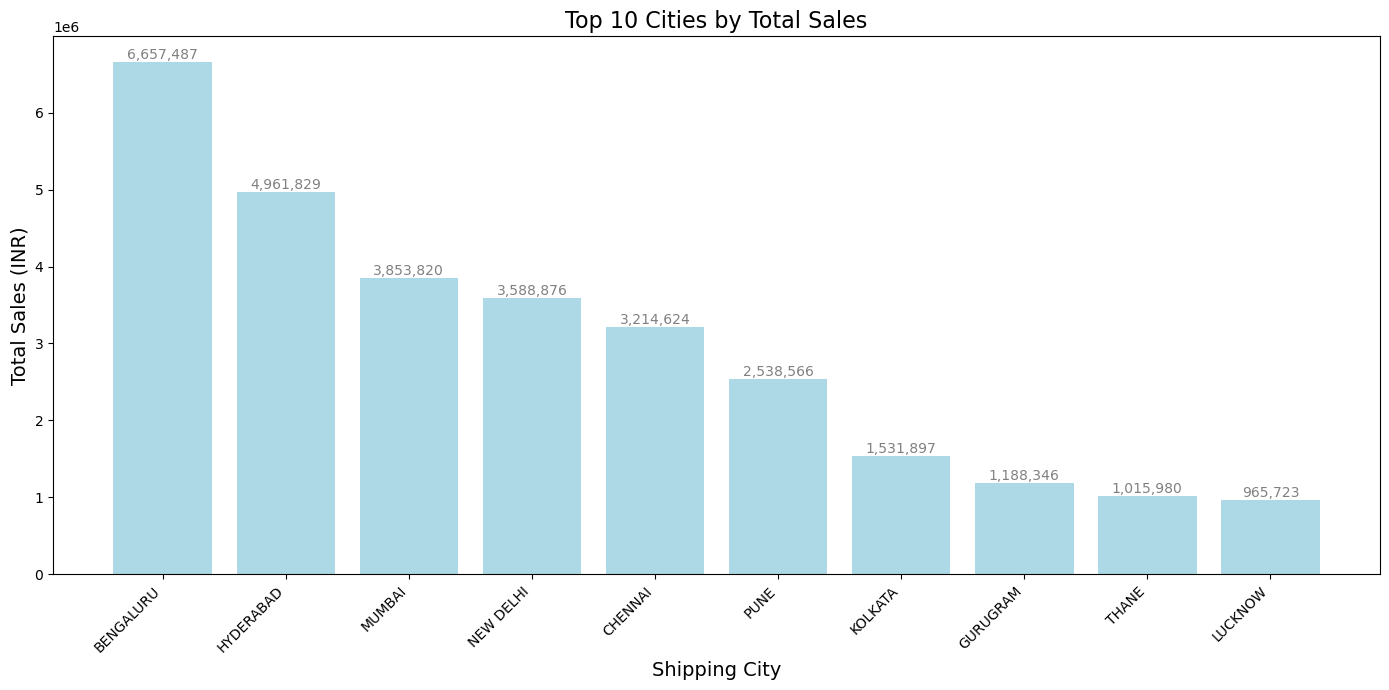

In [153]:
# Aggregating sales by Shipping City
sales_by_city = df.groupby('Shipping City')['Total Sales'].sum().sort_values(ascending=False).head(10)  # Top 10 cities for readability

# Plotting Top 10 Cities
plt.figure(figsize=(14, 7))
plt.bar(sales_by_city.index, sales_by_city.values, color='lightblue')
plt.title('Top 10 Cities by Total Sales', fontsize=16)
plt.xlabel('Shipping City', fontsize=14)
plt.ylabel('Total Sales (INR)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Adding data labels
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=10, color='grey')

plt.tight_layout()
plt.show()


- In terms of city-wise sales performance, Bangalore leads with over 6 million in sales, significantly outperforming other cities. Hyderabad follows with sales of over 4 million, while Mumbai ranks third at 3.8 million. 
- This indicates that Bangalore is a key revenue driver, and further attention could be given to this market to maximize growth potential. 
- Hyderabad and Mumbai, though trailing, still represent significant opportunities for revenue generation, especially with focused marketing or sales efforts in these regions.

<h5 style="color:#1E90FF;"> Examining how courier statuses vary across different states, identifying regions with higher cancellation rates or delivery issues.</h5>


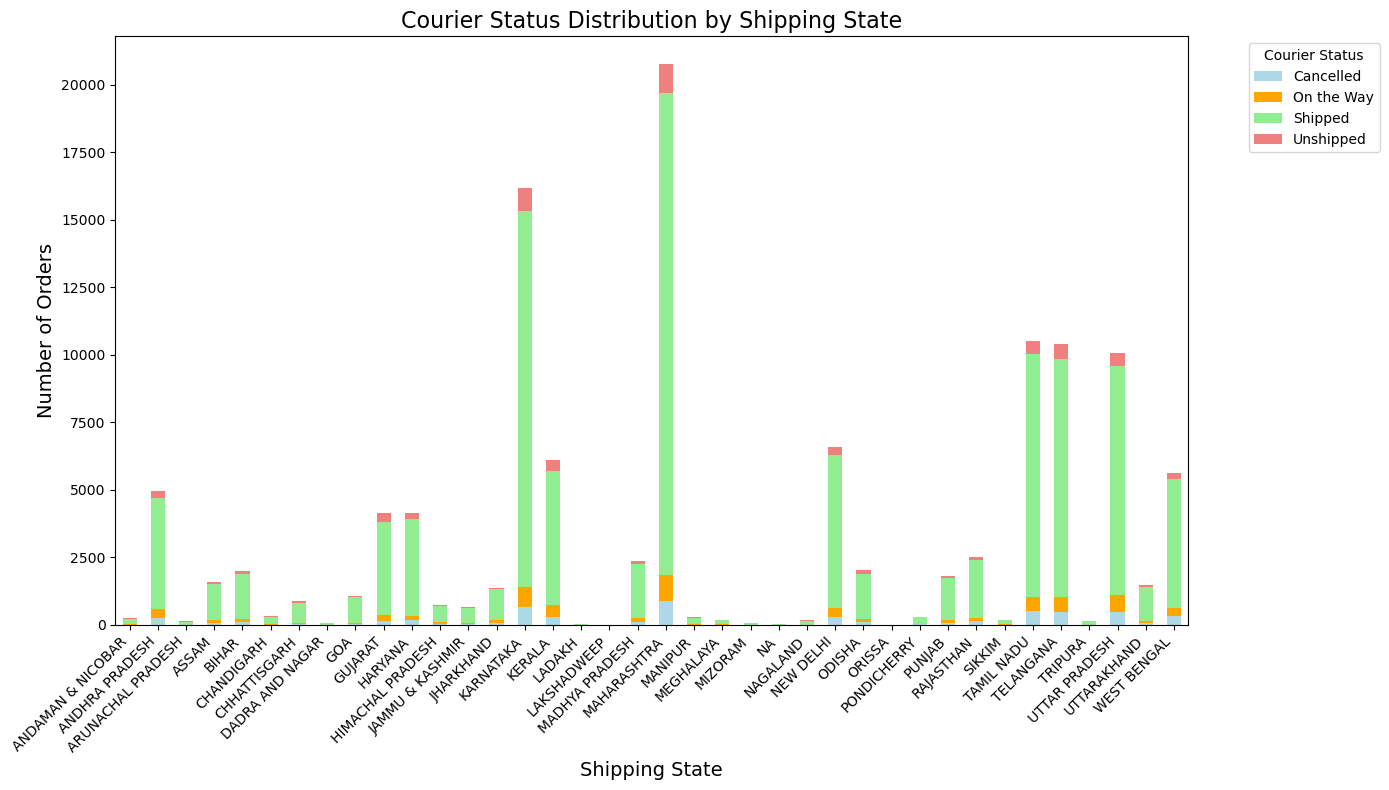

In [156]:
# Aggregating data by Shipping_State and Courier_Status
state_courier_crosstab = pd.crosstab(df['Shipping State'], df['Courier Status'])

# Plotting Stacked Bar Chart
state_courier_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8),
                            color=['lightblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Courier Status Distribution by Shipping State', fontsize=16)
plt.xlabel('Shipping State', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Courier Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- Maharashtra and Karnataka have high success rates in order fulfillment and delivery, with low cancellation and unshipped rates.
- Other states exhibit varying levels of performance, with some having higher rates of canceled or unshipped orders.

# Key Insights

1. **Sales Trends**: 
   - Sales peaked in April, indicating a period of strong demand, possibly driven by seasonal factors, promotions, or product launches.
   - A sharp decline in sales was observed from May to June, suggesting potential external factors like economic conditions or customer behavior shifts.

2. **Product Popularity**: 
   - T-shirts are the top-selling product category in terms of both total sales and quantity sold, followed by shirts and blazers.
   - Medium-sized (M) products have the highest sales and demand, while larger sizes (4XL, 5XL) are the least popular.

3. **Order Status and Cancellations**:
   - March had the highest cancellation rate, despite having the lowest order count and sales, which highlights potential issues with product availability or order processing.
   - The high number of canceled orders overall indicates potential for improving fulfillment processes and reducing cancellation rates.

4. **Fulfillment and Shipping Preferences**:
   - Amazon fulfillment accounts for the majority of sales, suggesting that customers trust and prefer faster, reliable fulfillment methods.
   - Expedited shipping is preferred by 68.9% of customers, indicating a strong demand for faster delivery options.



# Recommendations

1. **Promotional Strategies**:
   - Capitalize on the peak sales period (April) by launching targeted promotions and new products to sustain high demand.
   - Analyze the drop in sales from May to June and devise strategies like discounts, product bundles, or seasonal campaigns to drive sales.

2. **Product Inventory Optimization**:
   - Focus inventory management on popular products such as T-shirts and Medium-sized items, ensuring stock availability to meet customer demand.
   - Investigate reasons for lower sales in certain product categories (e.g., 4XL size) and adjust marketing or product offerings accordingly.

3. **Order Fulfillment Enhancement**:
   - Reduce cancellations by improving inventory forecasting and ensuring seamless order processing, especially for March.
   - Optimize fulfillment methods and provide more options for customers, especially in regions where Amazon fulfillment may not be accessible.

4. **Customer Experience Improvements**:
   - Given the preference for expedited shipping, consider offering more flexible delivery options or incentives for standard shipping to balance cost and service.
   - Investigate the reasons for order cancellations and introduce measures to improve customer satisfaction, such as better tracking, communication, and faster resolution of issues.
